# 3.Calidad de un vino

Dentro de las muchas variedades de vino existentes, algunas gustan más que otras, esto es debido al gusto de una persona en particular o bien a la gran cantidad de químicos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difícil.
Para esta actividad se trabajará con dos datasets asociados a las variantes tinto y blanco del vino portugués ”Vinho Verde”[4]. Debido a temas privados solo se cuenta con las característcas fisioquímicas asociadas a un vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link. Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,quality, es un valor entero entre 0 y 10.


In [2]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
from   sklearn.utils           import check_random_state
from   sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Using TensorFlow backend.


#### (a)  Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

La data contiene 6497 datos de los cuales 1599 son de vino tinto y 4898 de vino blanco distribuidos en los atributos

  * 1 - fixed acidity - float
  * 2 - volatile acidity - float
  * 3 - citric acid - float
  * 4 - residual sugar - float
  * 5 - chlorides - float
  * 6 - free sulfur dioxi - floatde
  * 7 - total sulfur dioxide - float
  * 8 - density - float
  * 9 - pH - float
  * 10 - sulphates - float
  * 11 - alcohol - float
  * Output variable (based on sensory data): 
  * 12 - quality (originalmente int entre 0 y 10) más adelante se usará unentero entre 0 y 1

In [3]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
#1 tinto
df_red['Tipo'] = 1.0
df_white = pd.read_csv("winequality-white.csv",sep=";")
#0 blanco
df_white['Tipo'] = 0.0

df = pd.concat([df_red,df_white], axis=0)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


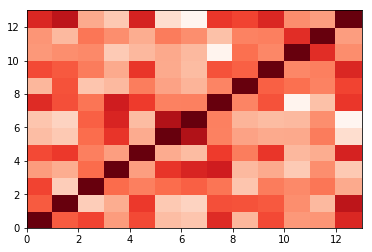

In [5]:
plt.pcolor(df.corr(),cmap=plt.cm.Reds)

plt.show()

En el heatmap se puede ver que los atributos 6 y 7 que corresponden free sulfur dioxide y total sulfur dioxide tienen una correlacion de 0.72, lo que hace sospechar que estas dos metricas tienen caracteristicas similares, algo similar ocurre con el alcohol y la densidad con una corr de -0.68 pero a diferencia de las 2 metricas anteriores son claras en su significado el
"Sulfur dioxide (SO2) is important in the winemaking process as it aids in preventing microbial growth and the oxidation of wine" este esta presente de dos formas en el vino como "free" y "bound", y "total" representaria la combinación de estos dos, pero como estas concentraciónes son unicas entre vino blancos y tintos se conservara el atributo "free sulfur dioxide" en el desarrollo debido a que este, se espera que ayude a mostrar la diferencia al clasificador cuando se trate la calidad de los vinos tintos y blancos

#### (b)  Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos,  considerando  como quality mayor  a  5  un  vino  de  buena  calidad.  El  conjunto  de  pruebas (25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

Se procede creando el dataset

In [11]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
df = df.drop('quality',axis=1)
#execute only once

In [12]:
y = df.good_quality
X = df.drop('good_quality',axis=1)
#execute only once

Luego definir nuestros datos,se separan los datos que usaremos de training y de testing 

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25, random_state=44)

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0


#### (c)  Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjuntode pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica F1-score [5] sobre el conjunto de entrenamiento y de pruebas.

Teniendo que elegir los hiper parámetros, se decido usar GridSearch para encontrar los valores más apropiados para un f1 score

In [45]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import classification_report,mean_absolute_error
import itertools
from sklearn.model_selection import GridSearchCV


def score_the_model(model,x,y,xt,yt,name,targets):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt,yt)
    print("sklearn decision tree, training error: %f" %mean_absolute_error(y, model.predict(x)))
    print("sklearn decision tree, testing error: %f" %mean_absolute_error(yt, model.predict(xt)))
    print ("%s Training Accuracy: %f"%(name,acc_tr))
    print ("%s Test Accuracy: %f"%(name,acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(yt, model.predict(xt),target_names=targets))
    
criterion =['gini','entropy']
splitter = ['best','random']
N_t = range(1,50)
model = Tree(random_state=0)
    
param_grid = dict(criterion = criterion,splitter = splitter, max_depth=N_t)
grid = GridSearchCV(estimator = model,param_grid=param_grid,n_jobs=-1,scoring = 'f1',cv=5)
grid_result = grid.fit(X_train,y_train)

print('Mejor: %f usando %s '%(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#for mean,std,param in zip(means,stds,params):
#    print('%f (%f) con : %r '%(mean,std,param))

print('Finalizado.')


Mejor: 0.814773 usando {'criterion': 'gini', 'max_depth': 22, 'splitter': 'random'} 
Finalizado.


Se obtuvo (solo con los datos de training) que lo mejor que se adapta al modelo, es usar un criterio de gini, con un split best y una profundiad maxima de 22.

In [43]:
model = Tree(criterion='gini',splitter='best',random_state=0,max_depth=22)
model.fit(X_train,y_train)

score_the_model(model,X_train,y_train,X_test,y_test,'entropy-random-31',['bueno','malo'])

sklearn decision tree, training error: 0.001642
sklearn decision tree, testing error: 0.243077
entropy-random-31 Training Accuracy: 0.998358
entropy-random-31 Test Accuracy: 0.756923
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

      bueno       0.68      0.67      0.67       610
       malo       0.80      0.81      0.81      1015

avg / total       0.76      0.76      0.76      1625



In [44]:
#f1_score(y_test, model.predict(X_test))
f1_score(y_train,model.predict(X_train))

0.99870967741935479

Con las medidas precision y recall se observa que estas estan a la par para cada clase, por lo que el fscore balanceado se comporta de la misma manera. En cuanto al training el f1 score se encontra al .99 .

#### (d)  Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la cantidad de árboles de decisión utilizados en el ensamblado ($n_estimators$), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [46]:
N_t = range(1,50)
criterion =['gini','entropy']
N_t = range(1,50)
model = Tree(random_state=0)
param_grid = dict(criterion = criterion, max_depth=N_t)
grid = GridSearchCV(estimator = model,param_grid=param_grid,n_jobs=-1,cv =5)
grid_result = grid.fit(X_train,y_train)

print('Mejor: %f usando %s '%(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Mejor: 0.757594 usando {'criterion': 'entropy', 'max_depth': 24} 


Se elige un modelo de tree {'criterion': 'entropy', 'max_depth': 24} y se procede a usar el ensamblador randomforest con Trees de este tipo.

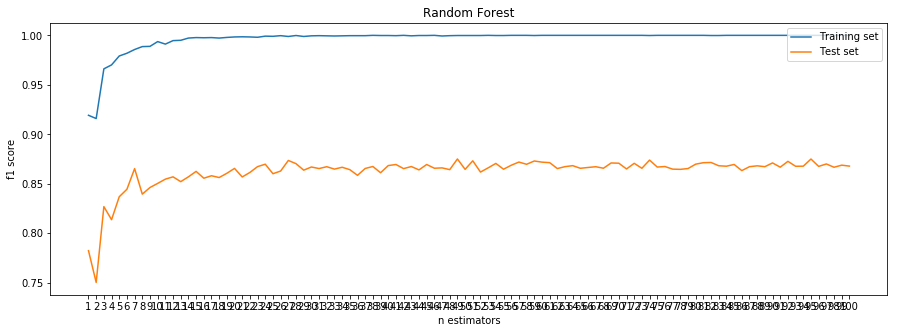

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
N_t = range(1,101)
info_train = []
info_test = []
for n in N_t:
    model = RandomForestClassifier(max_depth=24,criterion='entropy',n_estimators=n,n_jobs=-1)
    model.fit(X_train,y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    info_train.append(f1_score(y_train, model.predict(X_train)))
    info_test.append(f1_score(y_true, y_pred))


plt.figure( figsize=(15,5))
plt.plot(N_t,info_train, label = "Training set")
plt.plot(N_t,info_test, label = "Test set")
plt.xticks(N_t)
plt.xlabel('n estimators')
plt.ylabel('f1 score')
plt.title('Random Forest')
plt.legend(loc = 'upper right')
plt.show()

#### (e)  Entrene  un  ensamblador  de  árboles  de  múltiples  niveles,  mediante  la  técnica  de $AdaBoost$ .  Varíe  la cantidad de árboles de decisión utilizados en el ensamblado ($n_estimators$), realice un gráfico resumendel F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

Se usa el mismo modelo de arbol (max_depth=24, criterio =entropy) para poder coomparar las tecnicas de ensamble

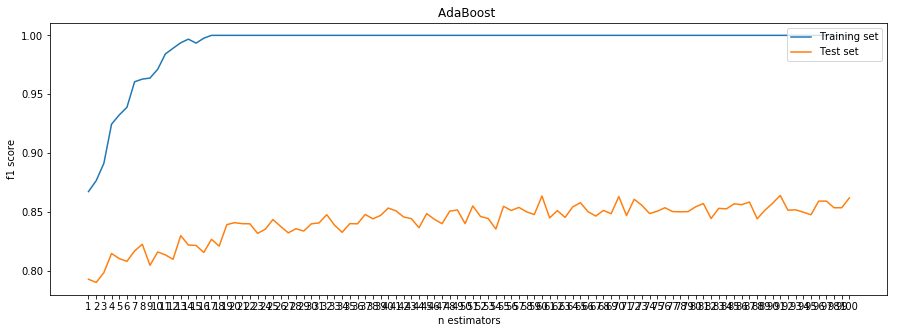

In [48]:
from sklearn.ensemble import AdaBoostClassifier
N_t = range(1,101)
info_train = []
info_test = []
for n in N_t:
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=8,criterion='entropy'), n_estimators=n)
    model.fit(X_train,y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    info_train.append(f1_score(y_train, model.predict(X_train)))
    info_test.append(f1_score(y_true, y_pred))


plt.figure( figsize=(15,5))
plt.plot(N_t,info_train, label = "Training set")
plt.plot(N_t,info_test, label = "Test set")
plt.xticks(N_t)
plt.xlabel('n estimators')
plt.ylabel('f1 score')
plt.title('AdaBoost ')
plt.legend(loc = 'upper right')
plt.show()

Se tiende que grandes numeros de estimadores Adaboost tiende a un crecimiento, en cambio RandomForest se tiene a mantener en un rango estable. Esto no es concluyente tal vez estimadores a un orden de magnitud mayor se vea otro comportamiento dado a la naturaleza de los metodo de ensamblado. En cuanto al tiempo que toma en realizar ambas tareas se aprecia que adaboost de demora mucho más que randomforest, esto se debe a que la ejecución de adaboost no es paralelizable como si lo es randomforest

#### (f)  Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
model.fit(X_train,y_train)
score_the_model(model,X_train,y_train,X_test,y_test,'ann',['Categoria 1','Categoria 2'])
#Buena forma de encontrar mejores resultados pero se demora mucho
#optimizer = ['SGD', 'Adam', 'Nadam']
#param_grid = dict(optimizer=optimizer)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,scoring='f1')
#grid_result = grid.fit(X_train, y_train)

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
4872/4872 [==============================] - 1s 264us/step - loss: 0.9366 - acc: 0.6069
Epoch 2/100
4872/4872 [==============================] - 1s 202us/step - loss: 0.6308 - acc: 0.6427
Epoch 3/100
4872/4872 [==============================] - 1s 177us/step - loss: 0.6028 - acc: 0.6652
Epoch 4/100
4872/4872 [==============================] - 1s 160us/step - loss: 0.5825 - acc: 0.6903
Epoch 5/100
4872/4872 [==============================] - 1s 166us/step - loss: 0.5794 - acc: 0.6890
Epoch 6/100
4872/4872 [==============================] - 1s 212us/step - loss: 0.5715 - acc: 0.6952
Epoch 7/100
4872/4872 [==============================] - 1s 169us/step - loss: 0.5607 - acc: 0.6997
Epoch 8/100
4872/4872 [==============================] - 1s 156us/step - loss: 0.5606 - acc: 0.6997
Epoch 9/100
4872/4872 [==============================] - 1s 176us/step - loss: 0.5573 - acc: 0.7036
Epoch 10/100
4872/4872 [==============================] - 1s 181us/step - loss: 0.5519 - acc: 0.7079

In [12]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('RandomForest', RandomForestClassifier()))
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=44)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_results2 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results.append(cv_results2)
    names.append(name)
    msg = "%s: Train: %f (%f) Test: %f (%f)" % (name, cv_results.mean(), cv_results.std(), cv_results2.mean(), cv_results2.std())
    print(msg)

LR: Train: 0.803795 (0.016068) Test: 0.808988 (0.022108)
LDA: Train: 0.803322 (0.014222) Test: 0.807310 (0.030325)
KNN: Train: 0.760608 (0.017211) Test: 0.729249 (0.036091)
CART: Train: 0.814469 (0.019188) Test: 0.767130 (0.034697)
NB: Train: 0.749484 (0.027053) Test: 0.767209 (0.041771)
QDA: Train: 0.800425 (0.014208) Test: 0.793371 (0.034083)
RandomForest: Train: 0.840541 (0.018027) Test: 0.806168 (0.023156)


Usando la metrica f1 sobre los clasificadores [LR,LDA,QDA,KNN,CART,NB,RandomForest,ANN] destacan LR,LDA,CART por obtener un f1 score del 80% , caso diferente es ANN que se logra subir de 67 a 75 cambiando el optimizador de SGD a adam y en la categoria2 también logra 0.80. $$ -$$
Entre los clasificadores se tiene que los resultados obtenidos son similares en su mayoria a simple vista la diferencia entre estos no es tan grande por lo que el problema es linealmente separable por lo que se aprecia en el uso de ambos tipos de metodos para intentar resolver

#### (g)  Defina  un  criterio  para  estimar  la  importancia  de  los  distintos  atributos  en  el  ensamblado  de $Random Forest$, implementelo  sobre  alguno  de  los  ensambladores  entrenados  en  d),  haga  un  ranking  de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es $AdaBoost$?


In [16]:
criterion =['gini','entropy']

N_t = range(1,50)
model = RandomForestClassifier(random_state=0)
param_grid = dict(criterion = criterion, max_depth=N_t)
grid = GridSearchCV(estimator = model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train,y_train)

print('Mejor: %f usando %s '%(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Mejor: 0.794335 usando {'criterion': 'gini', 'max_depth': 17} 


In [17]:
forest = RandomForestClassifier(random_state=0,max_depth=17)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 10 (0.133502)
2. feature 7 (0.124817)
3. feature 1 (0.113340)
4. feature 5 (0.087773)
5. feature 4 (0.085223)
6. feature 6 (0.082620)
7. feature 2 (0.078356)
8. feature 9 (0.077319)
9. feature 8 (0.076466)
10. feature 3 (0.068036)
11. feature 0 (0.065810)
12. feature 11 (0.006739)


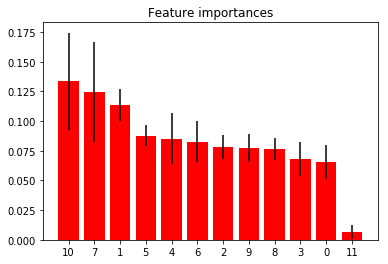

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0


In [19]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

X.head()

*¿Es posible implementar este criterio sobre una técnica de boost como lo es AdaBoost?* 
Segun la implementación de sklearn adaboost si posee al igual que random forest la opción de feature_importances_,
pero cuando algoritmo base es un arbol de decision  $$-$$"The feature_importances_ is an attribute available to sklearn's adaboost algorithm when the base classifier is a decision tree."